In [1]:
import os,sys
SYNEX_PATH=os.popen('pwd').read().split("/SYNEX/")[0]+"/SYNEX"
sys.path.insert(1, SYNEX_PATH)
import numpy as np
import glob
import json
import healpy as hp
import matplotlib.pyplot as plt
import SYNEX.SYNEX_Utils as SYU
import SYNEX.SYNEX_Detectors as SYDs
import SYNEX.SYNEX_Telescopes as SYTs
import SYNEX.SYNEX_Sources as SYSs


In [2]:
#### Start by connecting hard disk


In [3]:

# Copy across some files to local environment
os.system("cp /Volumes/easystore/inference_param_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_* "+SYNEX_PATH+"/inference_param_files/Randomized_SYNEX/RemakePaperPlots/")
os.system("cp /Volumes/easystore/inference_data/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_* "+SYNEX_PATH+"/inference_data/Randomized_SYNEX/RemakePaperPlots/")



0

In [4]:
# find Json files we want to look at
JsonFiles = glob.glob(SYNEX_PATH+"/inference_param_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_*")

# find h5 files we want to look at
h5Files = glob.glob(SYNEX_PATH+"/inference_data/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_*")


In [5]:
# Plotting options
%matplotlib inline
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


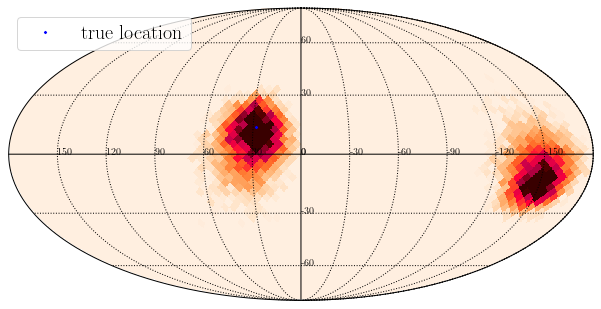

Tcut: 30.0 d
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_1mon
Post area: 2536.009678370098 deg^2
Fisher area: 953.4970198892184 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


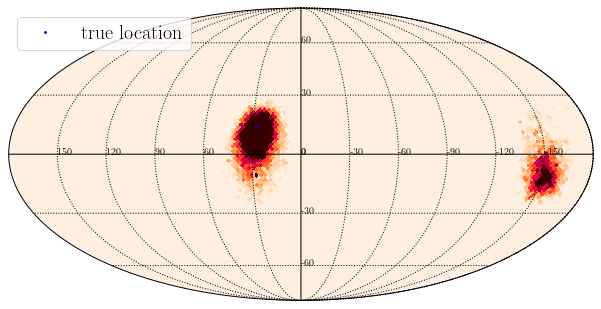

Tcut: 7.0 d
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_1wk
Post area: 805.2828842652178 deg^2
Fisher area: 408.0021703035643 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


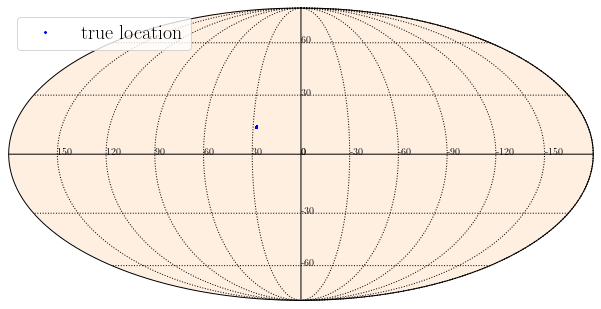

Tcut: 0.016666666666666666 h
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_1min
Post area: 3.357174580844667 deg^2
Fisher area: 0.12645100030872225 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


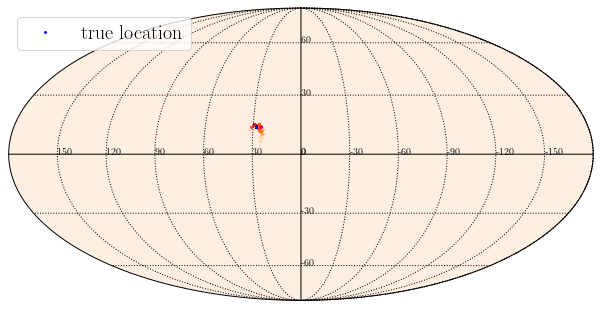

Tcut: 1.0 h
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_1hr
Post area: 25.25156136655914 deg^2
Fisher area: 12.634741993613249 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


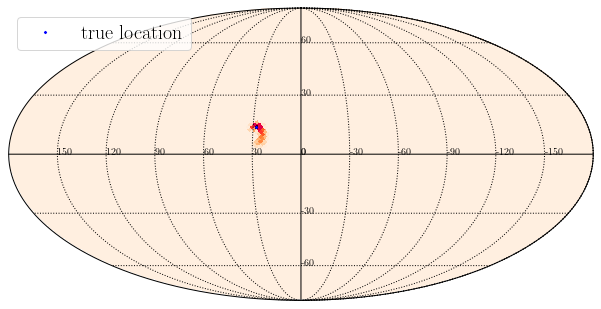

Tcut: 5.0 h
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_5hr
Post area: 55.02771649813665 deg^2
Fisher area: 32.21567054989711 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


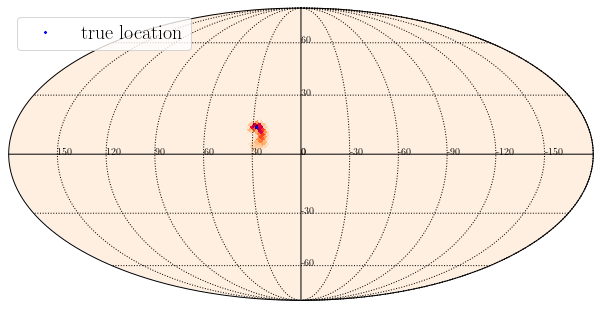

Tcut: 10.0 h
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_10hr
Post area: 84.09924564448406 deg^2
Fisher area: 49.10357685528899 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


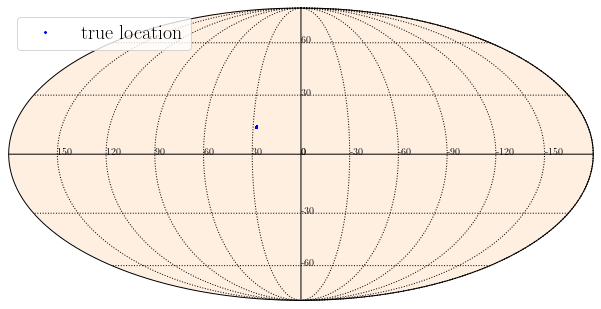

Tcut: No cut
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_0cut
Post area: 3.357174580844667 deg^2
Fisher area: 0.04097098938020345 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


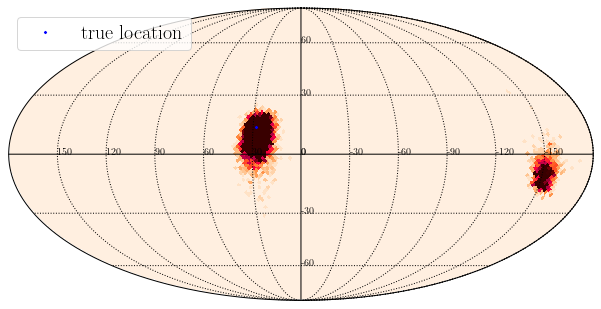

Tcut: 3.0 d
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_3d
Post area: 394.54099530535956 deg^2
Fisher area: 212.52022461590872 deg^2


setting the output map dtype to [dtype('float64')]
0.0 180.0 -180.0 180.0


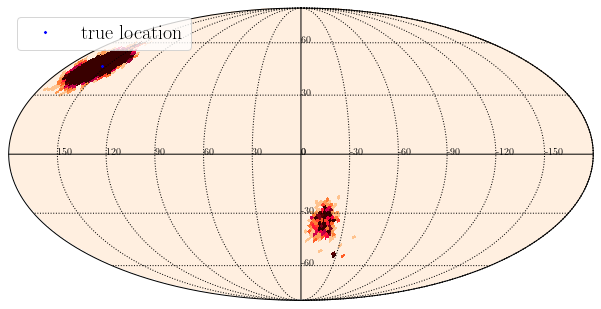

Tcut: 24.0 h
Fits location: /Users/baird/Documents/LabEx_PostDoc/SYNEX/Skymap_files/Randomized_SYNEX/RemakePaperPlots/Randomized_angles_spins_MRat_10_1d
Post area: 207.66611578509264 deg^2
Fisher area: 175.06858246824882 deg^2


In [6]:
# Loop through each system we found
for FileName in JsonFiles:
    # Turn file into SYNEX source class
    Merger=SYU.GetSourceFromLisabetaData(FileName, **{"verbose":False})
    
    # Assign a name for the skymap savefile (will be .fits format)
    Merger.sky_map = Merger.H5File.split("inference_data")[0] + 'Skymap_files' + Merger.H5File.split("inference_data")[-1].strip(".h5")
    
    # Calculate the skymap
    Merger.CreateSkyMapStruct(SkyMapFileName=None)
    
    # Plot the skymap
    SYU.PlotSkyMapData(Merger,SaveFig=False,plotName=None)

    # Calculate sky areas
    Merger.PostSkyArea = Merger.calculatePostSkyArea()
    Merger.FisherSkyArea = Merger.calculateFisherSkyArea()
    
    # Output
    if Merger.DeltatL_cut==None:
        Tcut_print = "No cut"
    else:
        tcut_days = -Merger.DeltatL_cut/(60*60*24)
        tcut_hours = tcut_days*24
        Tcut_print = str(tcut_days)+" d" if tcut_days>1 else str(tcut_hours)+" h"
    print("Tcut:",Tcut_print)
    print("Fits location:",Merger.sky_map)
    print("Post area:",Merger.PostSkyArea,"deg^2")
    print("Fisher area:",Merger.FisherSkyArea,"deg^2")

